<a href="https://colab.research.google.com/github/project-ida/time-dependent-schrodinger-equation/blob/master/waves-and-wave-packets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Time evolution of waves and wave packets

In this tutorial we are going to investigate the time dependent behavior of different waves, including the following:
1. simple sine and cosine waves and combinations thereof
2. traveling waves and standing waves
3. waves as complex exponentials
4. wave packets: waves with a gaussian envelope
5. dispersive wave packets: the generic behavior of quantum particles without bounds

To explain observed wave-like behavior of quantum particles such as photons and electrons (e.g. in the double slit experiment) differential equations for waves were considered. These take the general form: 

$$\frac{\partial^2\phi}{\partial x^2}-\frac{1}{c^2}\frac{\partial^2\phi}{\partial t^2} = 0$$

For a general introduction to differential equations such as wave equations, check out brilliant.org and 3blue1brown

Considering derivatives of sine and cosine suggests that solutions can be combinations trigonometric functions e.g.: 

$$cos(kx)*cos(kct)$$
$$sin(kx)*sin(kct)$$

Because of the close relationship between trigonometric functions and complex exponentials (link to video), the latter should be considered as well:

$$e^{ik(x+-ct)}$$

Below we will explore the behavior of different combinations of sine and cosine and complex exponential functions and their arguments. 

To do so, we will visualize most example as evolving 1D functions across 500 spatial units and across 400 time steps. Space will be represented by the x-axis and time via animation of the plot.

First, we need to prepare a few helper functions in Python:

## 1.1. Python helper functions

In [10]:
# loading some common python libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import Image
from IPython.core.display import HTML 
import sympy as sp
#from google.colab.output._publish import javascript
mathjaxurl = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
sp.init_printing(use_latex='mathjax') 

In [11]:
# define spatial range and time range

allx = np.arange(0,40,0.1) # size 400

allt = np.arange(0,50,0.1) # size 500

In [12]:
# create empty arrays for storing time progression for different functions

data1,data2,data3,data4,data5,data6 = np.zeros((6, allt.size, allx.size))

#data1[0] # for illustration show the first row (all x for t=0)

In [13]:
# create 2 empty subplots with 3 empty lines in each 

fig = plt.figure(figsize=(9,5))

axA = plt.subplot(211)
axA.set_ylim(-3,3)
linesA = []
for i in np.arange(0,3,1):
    lobj = axA.plot(allx,data1[0],linestyle="--",lw=0)[0]
    linesA.append(lobj)

axB = plt.subplot(212)
axB.set_ylim(-3,3)
linesB = []
for i in np.arange(0,3,1):
    lobj = axB.plot(allx,data1[0],linestyle="--",lw=0)[0]
    linesB.append(lobj)
    
plt.close()    

In [14]:
# function to make all available lines invisible in case they are not used in a particular animation

def reset_figure():
  
    global fig,axA,axB,linesA,linesB  
    
    for i in np.arange(0,3,1):
        linesA[i].set_lw(0)

    for i in np.arange(0,3,1):
        linesB[i].set_lw(0)

In [15]:
# animation function that is called once for every frame; it steps through the data arrays via counting variable i

def animate(i,data_graph1,data_graph2):
    
    for lineno,_ in enumerate(data_graph1):
        linesA[lineno].set_ydata(data_graph1[lineno][i])
        linesA[lineno].set_lw(2)

    for lineno,_ in enumerate(data_graph2):
        linesB[lineno].set_ydata(data_graph2[lineno][i])   
        linesB[lineno].set_lw(2)

## 1.2. Creating a first animation

Now that we have our infrastructure in place, we can start by creating a first animation. 

A sine or cosine with an increasing phase shows as a standing wave. Other arguments are kept simple: here $\omega=1$ and $k=1$ 

The upper subplot shows a pair of sine and cosine with equal arguments traveling left, the lower subplot shows a pair traveling right. 

In [16]:
for index,t in enumerate(allt): # step through every time step, at every time step evaluate the function at every x

    data1[index] = np.sin((allx*1)+1*t) 
    data2[index] = np.cos((allx*1)+1*t) 
    
    data3[index] = np.sin((allx*1)-1*t) 
    data4[index] = np.cos((allx*1)-1*t) 

In [ ]:
subplot1_data = (data1,data2)
subplot2_data = (data3,data4)

reset_figure()
ani = animation.FuncAnimation(fig,animate,frames=300,interval=20,fargs=(subplot1_data,subplot2_data))
rc('animation', html='jshtml')
ani

## 1.3. Combinations of traveling waves

For our wave differential equations, linear combinations of solutions are also solutions. So we are interested in understanding what different combinations of sine and cosine waves look likes. 

In the following example, we show the sum of two waves in the lower subplot. We will also start with different frequencies $k_2 = 0.25 k_2$ but let $k_2 \xrightarrow[]{} k_1$ We can see that when the frequencies are the same, we get a again a traveling wave.

In [18]:
k2 = 0.25 # start at 1/4th the frequency of k1 and approach k1=1 over time

for tindex,t in enumerate(allt):

    data1[tindex] = np.sin(1*allx+1*t) 
    data2[tindex] = np.cos(k2*allx+1*t) 
    
    data3[tindex] = np.sin(1*allx+1*t) + np.cos(k2*allx+1*t)

    if(k2<1):
        k2 = k2*1.008

In [ ]:
subplot1_data = (data1,data2)  
subplot2_data = (data3,)  

reset_figure()
ani = animation.FuncAnimation(fig,animate,frames=300,interval=20,fargs=(subplot1_data,subplot2_data))
rc('animation', html='jshtml')
ani

What happens with the frequency sweep, can also be illustrated through the plot below where spatial information is on the x axis and time progression on the y-axis. Around time 20, the frequency $k_2$ stops changing because $k_2 = k_1 = 1$ 

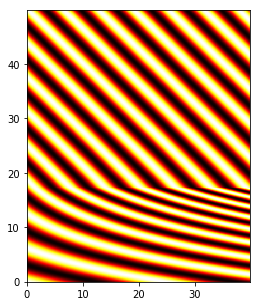

In [20]:
plt.figure(figsize=(4,5))
plt.pcolormesh(allx,allt,data2,cmap='hot')
plt.show()

Now we will consider what happens in the same scenario when the two traveling waves travel in opposite directions. When the frequencies match, we get a standing wave. 

In [21]:
k2 = 0.25 # start at 1/4th the frequency of k1 and approach k1=1 over time

for tindex,t in enumerate(allt):

    data1[tindex] = np.sin(1*allx+1*t) 
    data2[tindex] = np.cos(k2*allx-1*t) 
    
    data3[tindex] = np.sin(1*allx+1*t) + np.cos(k2*allx-1*t)

    if(k2<1):
        k2 = k2*1.008

In [ ]:
subplot1_data = (data1,data2) 
subplot2_data = (data3,)

reset_figure()
ani = animation.FuncAnimation(fig,animate,frames=300,interval=20,fargs=(subplot1_data,subplot2_data))
rc('animation', html='jshtml')
ani

## 1.4. Traveling waves as complex exponentials

So far we generated our data through calling sine and cosine functions. However, we will want to get used to expressing a connected pair of sine and cosine functions through a complex exponential of the form:

$$e^{ik(x+-ct)}$$

This is because of the equivalence:

$$e^{ix} = \cos x + i\sin x$$ For a deeper treatment, consider (...)

Such a complex exponential can then be split into real and imaginary parts. Below we show the real part and note that the resulting animations are identical to above. The imaginary parts of the functions will produce an equivalent animation that is simply shifted by $\frac{\pi}{2}$

In [23]:
k = 0.25 # start at 1/4th the frequency and appraoch k=1 over time

for tindex,t in enumerate(allt):

    data1[tindex] = (np.exp(1.0j*(1*allx+1*t))).real
    data2[tindex] = (np.exp(1.0j*(k*allx-1*t))).real
    
    data3[tindex] = (np.exp(1.0j*(1*allx+1*t))).real + (np.exp(1.0j*(k*allx-1*t))).real

    if(k<1):
        k = k*1.008

In [ ]:
subplot1_data = (data1,data2) 
subplot2_data = (data3,)

reset_figure()
ani = animation.FuncAnimation(fig,animate,frames=300,interval=20,fargs=(subplot1_data,subplot2_data))
rc('animation', html='jshtml')
ani

## 1.5. Non-dispersive wave packets

The particle-like nature of quantum objects requires the solution to the wave equation to be localized in space under some circumstances. This can be accomplished by multiplying it by a localizing function. From the dispersion relation it can be derived that a Gaussian envelope function is appropriate.

See https://en.wikipedia.org/wiki/Gaussian_function for background on the Gaussian which takes the general form:

$$f(x)=ae^{-{\frac {(x-b)^{2}}{2\sigma^{2}}}}$$

Because the lump moves across space but keeps its shape, this is described as a non-dispersive wave packet: see https://en.wikipedia.org/wiki/Wave_packet#Non-dispersive. On the Wiki page, the full expression is derived as 

$$u(x,t) = e^{-(x-ct)^2 +ik_0(x-ct)}$$

which is what is used below in the animation.

Finally it is shown that the absolute value of the complex exponential gives back the envelope which is also equivalent to the probability function.

In [25]:
sigma = 1 # sigma determines the width of the lump
a = 2 # the amplitude of the lump
k = 2 # the frequency of the traveling waves

for tindex,t in enumerate(allt):

    data1[tindex] = a*np.exp(-(allx-1*t)**2/(2*sigma**2))
    data2[tindex] = (np.e**(1.0j*(k*allx-1*t))).real
    data3[tindex] = (np.e**(1.0j*(k*allx-1*t))).imag

    data4[tindex] = a*np.exp(-(allx-1*t)**2/(2*sigma**2)) * (np.e**(1.0j*(k*allx-1*t))).real
    data5[tindex] = a*np.exp(-(allx-1*t)**2/(2*sigma**2)) * (np.e**(1.0j*(k*allx-1*t))).imag
    data6[tindex] = np.abs(a*np.exp(-(allx-1*t)**2/(2*sigma**2)) * np.e**(1.0j*(k*allx+1*t)))

In [ ]:
subplot1_data = (data1,data2,data3)  
subplot2_data = (data4,data5,data6) 

reset_figure()
ani = animation.FuncAnimation(fig,animate,frames=300,interval=20,fargs=(subplot1_data,subplot2_data))
rc('animation', html='jshtml')
ani

## 1.6. Dispersive wave packets

The need for dispersion follows from the Schroedinger equation i.e. the quantum wave equation. For a derivation, see here: https://en.wikipedia.org/wiki/Wave_packet#Dispersive

Here, we show:

$$\psi (x,t) = {\frac {\sqrt[{4}]{2/\pi }}{\sqrt {1+2it}}}e^{-{\frac {1}{4}}k_{0}^{2}}~e^{-{\frac {1}{1+2it}}\left(x-{\frac {ik_{0}}{2}}\right)^{2}}$$

$$ = {\frac {a}{\sqrt {1+2it}}}e^{-{\frac {1}{1+4t^{2}}}(x-k_{0}t)^{2}}~e^{i{\frac {1}{1+4t^{2}}}((k_{0}+2tx)x-{\frac {1}{2}}tk_{0}^{2})}$$

In [27]:
a = 3
k0 = 4

for tindex,t in enumerate(allt):
    
    t = t/3

    data1[tindex] = (a/np.sqrt(1+2*1.0j*t)).imag * (np.exp(-(allx-k0*t)**2/(1+4*t**2)) * np.exp(1.0j*(k0*allx+2*t*allx**2 - 0.5*t*k0**2)/(1+4*t**2))).imag
    data2[tindex] = (a/np.sqrt(1+2*1.0j*t)).real * (np.exp(-(allx-k0*t)**2/(1+4*t**2)) * np.exp(1.0j*(k0*allx+2*t*allx**2 - 0.5*t*k0**2)/(1+4*t**2))).real
    
    data4[tindex] = np.abs(a/np.sqrt(1+2*1.0j*t) * np.exp(-(allx-k0*t)**2/(1+4*t**2)) * np.exp(1.0j*(k0*allx+2*t*allx**2 - 0.5*t*k0**2)/(1+4*t**2)))
    

In [28]:
data3,data5,data6 = np.zeros((3, allt.size, allx.size))

In [ ]:
subplot1_data = (data1,data2,data3)  
subplot2_data = (data4,data5,data6) 

reset_figure()
ani = animation.FuncAnimation(fig,animate,frames=300,interval=20,fargs=(subplot1_data,subplot2_data))
rc('animation', html='jshtml')
ani

In the 2D plot, we can also nicely see the dispersion of the wave packet across space as time progresses (here seen is the absolute value i.e. the probability density):

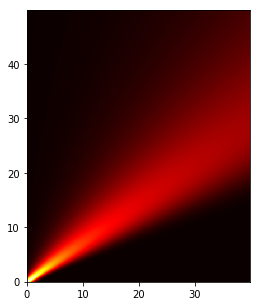

In [30]:
plt.figure(figsize=(4,5))
plt.pcolormesh(allx,allt,data4,cmap='hot')
plt.show()

The above mathematical expression is rather messy and it's easy to make mistakes when implementing it in code. Fortunately, Python offers a convenient mechanism to parse the formula and display it in Mathjax for easy checking. We simply define the variables as symbols in SymPy and replace the np functions with sp functions:

In [31]:
x, t, a, k0 = sp.symbols('x t a k0')

formula = a/sp.sqrt(1+2*1.0j*t) * sp.exp(-(x-k0*t)**2/(1+4*t**2)) * sp.exp(1.0j*(k0*x+2*t*x**2 - 0.5*t*k0**2)/(1+4*t**2))
formula

               2         ⎛        2                 2⎞
   -(-k₀⋅t + x)    1.0⋅ⅈ⋅⎝- 0.5⋅k₀ ⋅t + k₀⋅x + 2⋅t⋅x ⎠
   ──────────────  ───────────────────────────────────
         2                          2                 
      4⋅t  + 1                   4⋅t  + 1             
a⋅ℯ              ⋅ℯ                                   
──────────────────────────────────────────────────────
                     _____________                    
                   ╲╱ 2.0⋅ⅈ⋅t + 1                     

## 1.7. Position space and momentum space, and the Heisenberg uncertainty relation

The dispersion of the wave packet is also a reflection of the Heisenberg uncertainty relation: the quantum object is either more precisely defined in geometric space (position space) but with uncertain frequency i.e. energy (momentum space), or it is more precisely defined with respect to its frequency but not its location. Instructive is that Heisenberg's original term "Unschaerfe" means unsharpness rather than uncertainty. See also this discussion: (...).   

We can switch between position space and momentum space by taking the Fourier transform. 

Fortunately, applying the Fourier transform to an exponential function is pretty straightforward:

In [32]:
x, k, w, t = sp.symbols('x k w t')
simple_exponential = sp.exp(1.0j * (k*x-w*t))
simple_exponential

 1.0⋅ⅈ⋅(k⋅x - t⋅w)
ℯ                 

In [33]:
sp.fourier_transform(simple_exponential, x, k)  

                ⎛ 1.0⋅ⅈ⋅k⋅x - 1.0⋅ⅈ⋅t⋅w      ⎞
FourierTransform⎝ℯ                     , x, k⎠

Below we use Python's Fast Fourier Transform (FFT) function to transform each position space function into its corresponding momentum space function. We can see that the peak in the momentum space gets narrower as the wave disperses in position space, although the result is imperfect due to the narrow position range that we are considering.

For more information about FFT in Python, consider:  see https://nbviewer.jupyter.org/github/balzer82/FFT-Python/blob/master/FFT-Tutorial.ipynb

In [34]:
a = 3
k0 = 4

for tindex,t in enumerate(allt):
    
    t = t/3

    data1[tindex] = (a/np.sqrt(1+2*1.0j*t)).imag * (np.exp(-(allx-k0*t)**2/(1+4*t**2)) * np.exp(1.0j*(k0*allx+2*t*allx**2 - 0.5*t*k0**2)/(1+4*t**2))).imag
    data2[tindex] = (a/np.sqrt(1+2*1.0j*t)).real * (np.exp(-(allx-k0*t)**2/(1+4*t**2)) * np.exp(1.0j*(k0*allx+2*t*allx**2 - 0.5*t*k0**2)/(1+4*t**2))).real
    
    data2_xspace  = (a/np.sqrt(1+2*1.0j*t)).real * (np.exp(-(allx-k0*t)**2/(1+4*t**2)) * np.exp(1.0j*(k0*allx+2*t*allx**2 - 0.5*t*k0**2)/(1+4*t**2))).real
    data2_kspace = np.fft.fft(data2_xspace)
    N = len(data2_kspace)/2+1
    
    data4[tindex] = np.concatenate((np.abs(data2_kspace[:N])/8, np.zeros(199)), axis=None)


In [ ]:
subplot1_data = (data1,data2)  
subplot2_data = (data4,) 

reset_figure()
ani = animation.FuncAnimation(fig,animate,frames=300,interval=20,fargs=(subplot1_data, subplot2_data))
rc('animation', html='jshtml')
ani

Below are a few still that focus on that point:

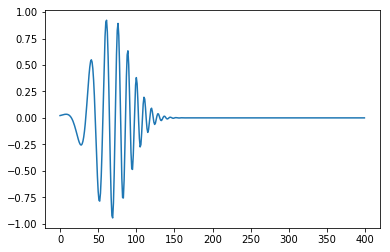

In [36]:
data_xspace = data1[50]

plt.plot(data_xspace) 

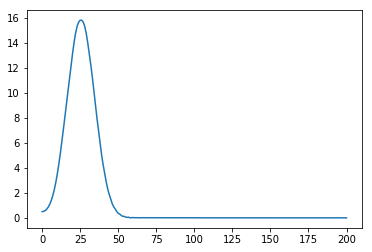

In [37]:
data_kspace = np.fft.fft(data_xspace)
N = len(data_kspace)/2+1
    
plt.plot(np.abs(data_kspace[:N]))    

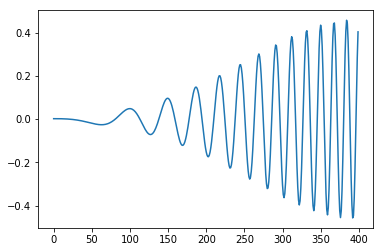

In [38]:
data_xspace = data1[300]

plt.plot(data_xspace) 

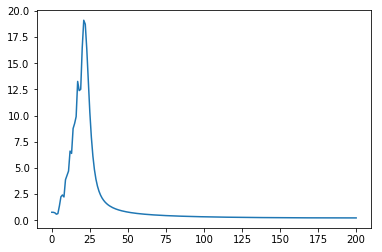

In [39]:
data_kspace = np.fft.fft(data_xspace)
N = len(data_kspace)/2+1
    
plt.plot(np.abs(data_kspace[:N]))    

A better illustration of the discussed relationship between position space and momentum space uncertainty is provided by KevinYager at http://gisaxs.com/index.php/Wave_packet which is referenced below:

In [40]:
Image(url= "http://gisaxs.com/images/a/aa/Space_tradeoff.png", width=500)